<a href="https://colab.research.google.com/github/Salma-Abouzeid/Classification-Models-Mushrooms-/blob/main/Copy_of_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%pip install ucimlrepo

In [53]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
x = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [54]:
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [55]:
y

,class
0,p
1,p
2,p
3,p
4,p
...,...
61064,p
61065,p
61066,p
61067,p


## EDA and Preprocessing


In [56]:
import numpy as np
np.random.seed(44)

In [57]:
import pandas as pd
df = pd.concat([x, y], axis=1) #A whole dataframe so when dropping an axis, there's no misalignment

In [58]:
print(df.shape)
print('No of duplicates: ',df.duplicated().sum())

(61069, 21)
No of duplicates:  146


In [59]:
df=df.drop_duplicates()
print('No of duplictes:',df.duplicated().sum())
print(df.shape)

No of duplictes: 0
(60923, 21)


In [60]:
for i in df:
    print(i)
    print(df[i].unique())
#Some features have null values

cap-diameter
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape
['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-surface
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
cap-color
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed
['f' 't']
gill-attachment
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
gill-spacing
[nan 'c' 'd' 'f']
gill-color
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-height
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-root
['s' nan 'b' 'r' 'c' 'f']
stem-surface
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
stem-color
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
veil-type
['u' nan]
veil-color
['w' 'y' nan 'n' 'e' 'u' 'k']
has-ring
['t' 'f']
ring-type
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
spore-print-color
[nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']
habitat
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season
['w' 'u' 'a' 's']
class
['p' 'e']


In [61]:
nulls=df.isnull().sum()
print(nulls)
print("Null percentages:")
print( (nulls / 60923) *100 )

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
class                       0
dtype: int64
Null percentages:
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.176797
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.176157
gill-spacing            41.137173
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000

my idea for the nulls:
-For high percentages of null like stem-root, veil-type, veil-color, spore-print-color : drop the feature/column

-For features with medium count of nulls like gill-spacing,stem-surface : impuation methods like KNN, mean or mode to fill the nulls

-For features with a smaller percentage of nulls like cap-surface, gill-attachment, ring-type: drop the rows with nulls

In [62]:
df=df.drop(['stem-root','veil-type','veil-color','spore-print-color'],axis=1)
df=df.dropna(subset=['cap-surface','gill-attachment','ring-type'])
df=df.fillna({'gill-spacing':df['gill-spacing'].mode()[0],'stem-surface':df['stem-surface'].mode()[0]})

In [63]:
print(df.isnull().sum())

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

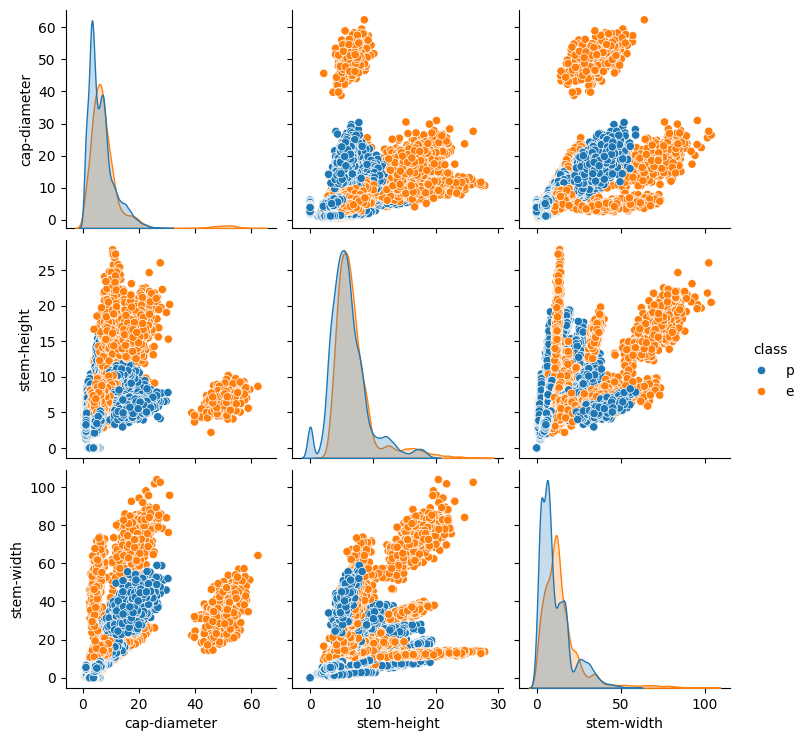

In [65]:
sns.pairplot(df,hue='class')

<Axes: xlabel='has-ring', ylabel='Count'>

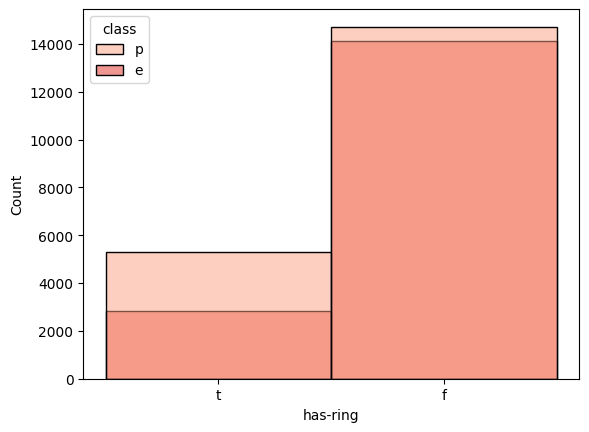

In [66]:
sns.histplot(x='has-ring',hue='class',data=df,palette='Reds')
#existence of ring is almost related to being poisonous but does not contribute to it much as having a ring is a 50/50 chance it's poisonous
#but non existence of ring mostly mean it's edible, so it's an important feature

/tmp/ipython-input-3569856761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class',y='cap-diameter',data=df,palette='Reds')
/tmp/ipython-input-3569856761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class',y='stem-height',data=df,palette='Reds')
/tmp/ipython-input-3569856761.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class',y='stem-width',data=df,palette='Reds')


<Axes: >

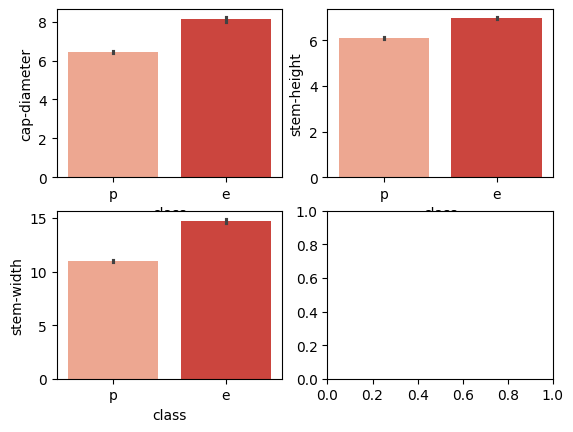

In [67]:
plt.subplot(2,2,1)
sns.barplot(x='class',y='cap-diameter',data=df,palette='Reds')
plt.subplot(2,2,2)
sns.barplot(x='class',y='stem-height',data=df,palette='Reds')
plt.subplot(2,2,3)
sns.barplot(x='class',y='stem-width',data=df,palette='Reds')
plt.subplot(2,2,4)
#Poisonous mushrooms have smaller diameter, smaller stem height and smaller same stem width
#so a note, it's relatively smaller

<Axes: xlabel='season', ylabel='count'>

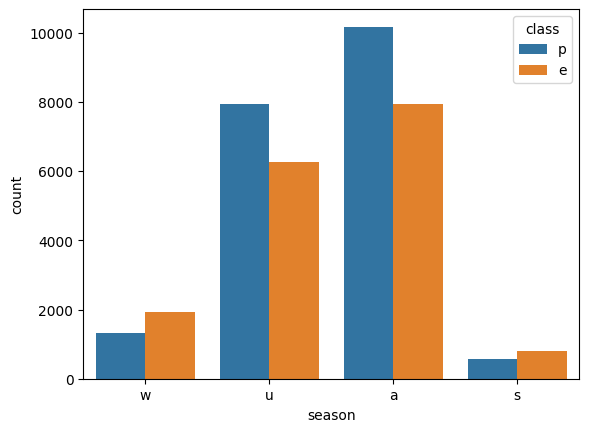

In [68]:
sns.countplot(x='season',data=df,hue='class') #Mushrooms grow more in summer and autumns, but are then more likely to be poisonous

<Axes: xlabel='class', ylabel='count'>

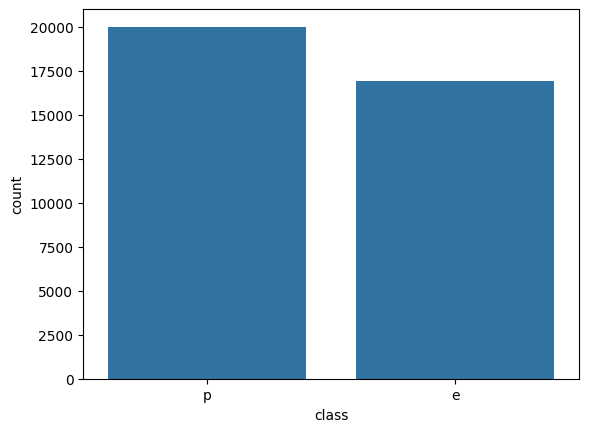

In [69]:
sns.countplot(x='class',data=df) #more poisonous cases (DATASET IS NOT BALANCED)

<Axes: xlabel='habitat', ylabel='count'>

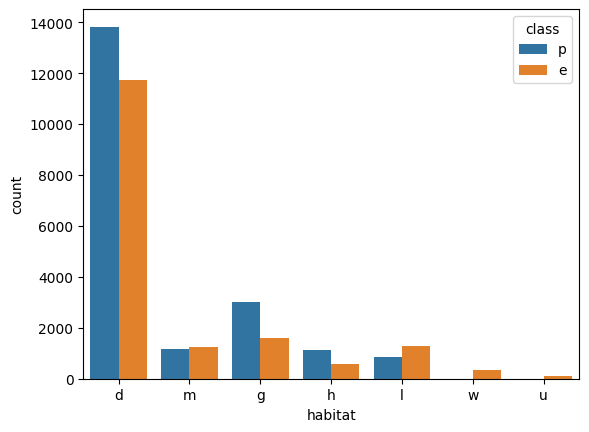

In [70]:
sns.countplot(x='habitat',hue='class',data=df) #most mushrooms are in d (woods) and no specfic pattern for class

<Axes: xlabel='cap-shape', ylabel='count'>

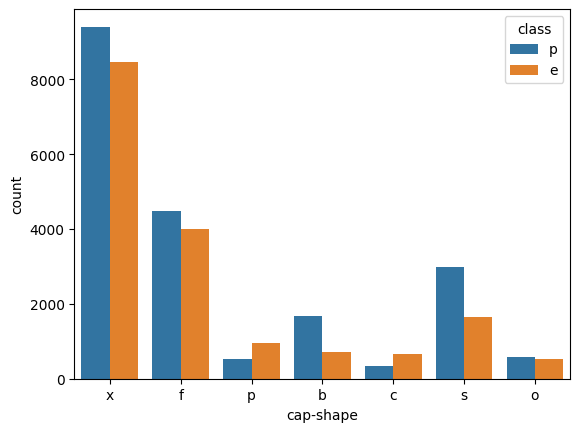

In [71]:
sns.countplot(x='cap-shape',hue='class',data=df) #most are convex and no specfic pattern for class

<Axes: xlabel='stem-width', ylabel='Count'>

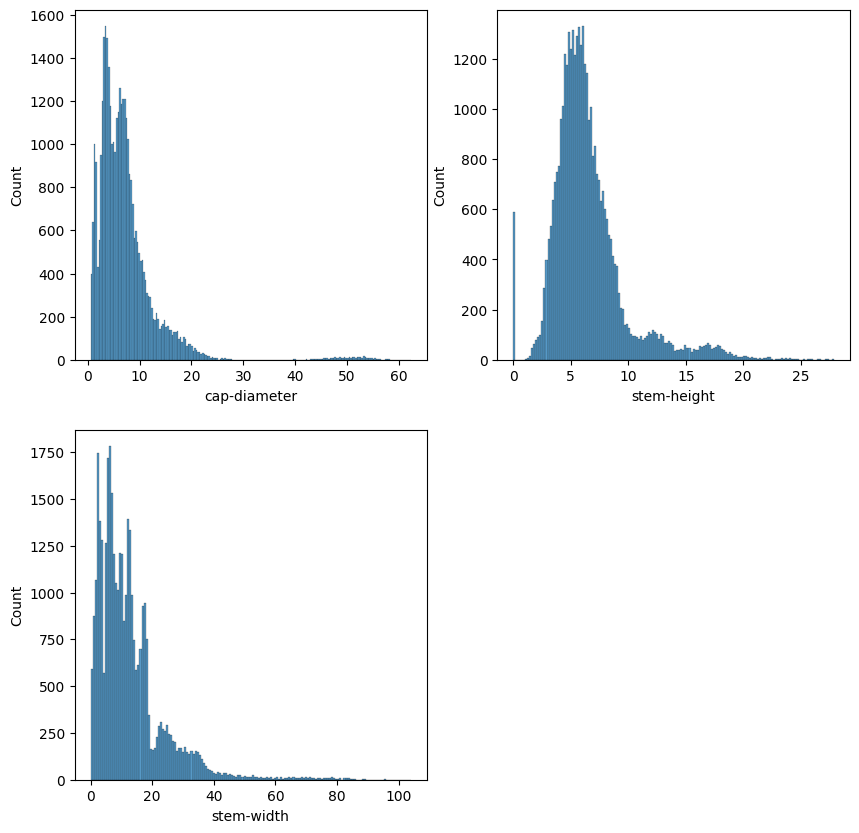

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x='cap-diameter',data=df)
plt.subplot(2,2,2)
sns.histplot(x='stem-height',data=df)
plt.subplot(2,2,3)
sns.histplot(x='stem-width',data=df)

#Data is not normally distributed.

<Axes: xlabel='class', ylabel='cap-diameter'>

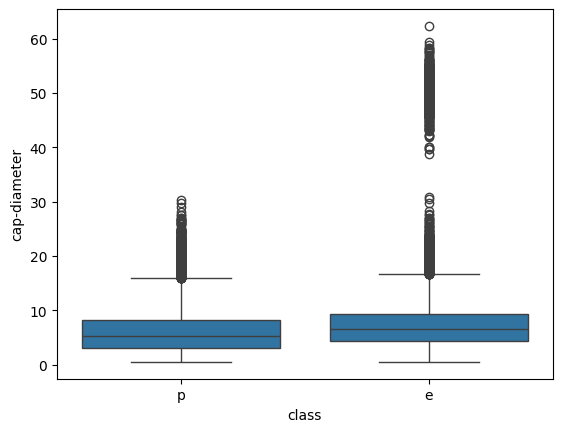

In [73]:
sns.boxplot(x='class',y='cap-diameter',data=df) #Outliers

<Axes: xlabel='does-bruise-or-bleed', ylabel='count'>

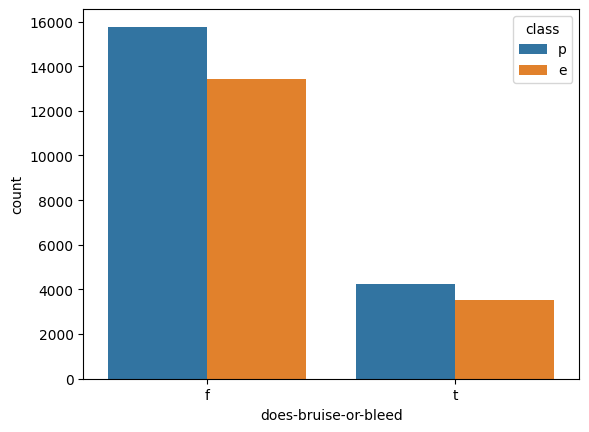

In [75]:
sns.countplot(x='does-bruise-or-bleed',hue='class',data=df)
#the percentage of poisonous to edible classes in both feature categories are almost the same, so it would not contribute much

# Encoding

In [76]:
numerical_features=df.select_dtypes(include=['int64','float64'])
categorical_features = (df.drop('class',axis=1)).select_dtypes(exclude=['int64', 'float64'])

In [77]:
from sklearn.feature_selection import f_classif #correlation of numerical features with target using ANOVA
for i in numerical_features:
  f_value,p_value=f_classif(numerical_features[i].values.reshape(-1,1),df['class'])
  print(f"Feature: {i}, F-value: {f_value}, P-value: {p_value}")

Feature: cap-diameter, F-value: [723.03250314], P-value: [9.72722308e-158]
Feature: stem-height, F-value: [677.12624996], P-value: [6.09493515e-148]
Feature: stem-width, F-value: [1051.47206899], P-value: [1.82441442e-227]


| Feature      | F-value | P-value     | Interpretation                                         |
| ------------ | ------- | ----------- | ------------------------------------------------------ |
| cap-diameter | 723.03  | \~9.73e-158 | Extremely significant                                  |
| stem-height  | 677.13  | \~6.09e-148 | Extremely significant                                  |
| stem-width   | 1051.47 | \~1.82e-227 | Even more significant; strongest predictor among these |


In [79]:
from scipy.stats import chi2_contingency #correlation of categorical features with target using chi-square
for i in categorical_features:
  contingency_table = pd.crosstab(df[i], df['class'])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"Feature: {i}, Chi-square: {chi2}, P-value: {p}")

Feature: cap-shape, Chi-square: 809.067855468816, P-value: 1.6911201930363101e-171
Feature: cap-surface, Chi-square: 2610.3907056361463, P-value: 0.0
Feature: cap-color, Chi-square: 2392.8682537273075, P-value: 0.0
Feature: does-bruise-or-bleed, Chi-square: 0.6275125472853753, P-value: 0.4282691985277344
Feature: gill-attachment, Chi-square: 2491.7852917105615, P-value: 0.0
Feature: gill-spacing, Chi-square: 291.80452455982044, P-value: 4.319690135149065e-64
Feature: gill-color, Chi-square: 887.4888343198533, P-value: 3.0332353873251102e-183
Feature: stem-surface, Chi-square: 2495.5820241095817, P-value: 0.0
Feature: stem-color, Chi-square: 3746.6679252482054, P-value: 0.0
Feature: has-ring, Chi-square: 507.8754099869845, P-value: 1.838512095970457e-112
Feature: ring-type, Chi-square: 2006.0663621057738, P-value: 0.0
Feature: habitat, Chi-square: 1071.9815801952473, P-value: 2.4047099172673746e-228
Feature: season, Chi-square: 378.3127027903199, P-value: 1.1026796400769573e-81


| Feature                  | Chi-square | P-value   | Interpretation          |
| ------------------------ | ---------- | --------- | ----------------------- |
| **cap-shape**            | 809.07     | 1.69e-171 | Highly significant      |
| **cap-surface**          | 2610.39    | 0.0       | Very highly significant |
| **cap-color**            | 2392.87    | 0.0       | Very highly significant |
| **does-bruise-or-bleed** | 0.63       | 0.43      | Not significant       |
| **gill-attachment**      | 2491.79    | 0.0       | Very highly significant |
| **gill-spacing**         | 291.80     | 4.32e-64  | Highly significant      |
| **gill-color**           | 887.49     | 3.03e-183 | Very highly significant |
| **stem-surface**         | 2495.58    | 0.0       | Very highly significant |
| **stem-color**           | 3746.67    | 0.0       | Extremely significant   |
| **has-ring**             | 507.88     | 1.84e-112 | Highly significant      |
| **ring-type**            | 2006.07    | 0.0       | Very highly significant |
| **habitat**              | 1071.98    | 2.40e-228 | Extremely significant   |
| **season**               | 378.31     | 1.10e-81  | Highly significant      |


In [80]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(categorical_features)
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(categorical_features.columns),index=df.index )
df.drop(categorical_features.columns,axis=1,inplace=True)
df=pd.concat([df,encoded_df],axis=1)

In [81]:
df

,cap-diameter,stem-height,stem-width,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,1.27,3.18,5.43,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,1.27,3.86,6.37,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,1.24,3.56,5.44,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
x=df.drop('class',axis=1)
y=df['class']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44,stratify=y)
#parameter stratify to make sure we do not miss a minority class
print(y_train.value_counts())
print(y_test.value_counts())

class
1    16003
0    13555
Name: count, dtype: int64
class
1    4001
0    3389
Name: count, dtype: int64


In [84]:
from sklearn.preprocessing import PowerTransformer
sc=PowerTransformer() #I chose this because of outliers and the skewness
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

# LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3389
           1       0.85      0.83      0.84      4001

    accuracy                           0.83      7390
   macro avg       0.83      0.83      0.83      7390
weighted avg       0.83      0.83      0.83      7390

[[2812  577]
 [ 672 3329]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


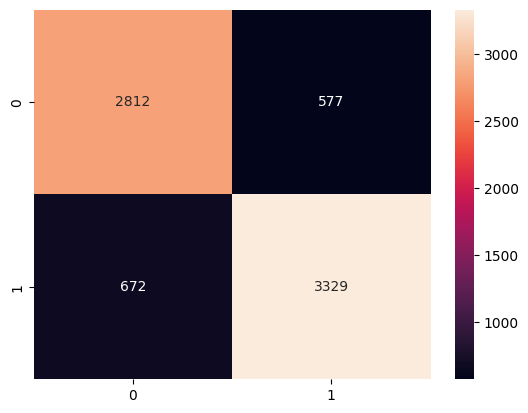

In [143]:
#Baseline
lr=LogisticRegression(random_state=44)
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
print(classification_report(y_test,y_pred))
lr_base_report=classification_report(y_test,y_pred,output_dict=True)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')
y_prob_base= lr.predict_proba(x_test)[:, 1]

In [91]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,lr.predict(x_train_scaled)))
#Almost the same as testing so no underfitting or overfitting

Evaluate Training
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     13555
           1       0.85      0.83      0.84     16003

    accuracy                           0.83     29558
   macro avg       0.83      0.83      0.83     29558
weighted avg       0.83      0.83      0.83     29558



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'max_iter': 50, 'penalty': 'l2', 'random_state': 44, 'solver': 'saga'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3389
           1       0.85      0.83      0.84      4001

    accuracy                           0.83      7390
   macro avg       0.83      0.83      0.83      7390
weighted avg       0.83      0.83      0.83      7390

[[2813  576]
 [ 670 3331]]


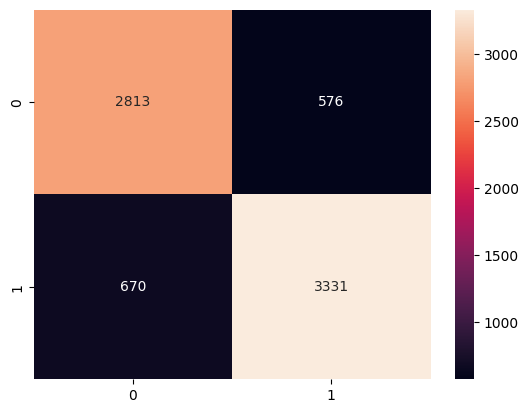

In [92]:
#cross validation (Tuned)
from sklearn.model_selection import GridSearchCV
grid= {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [50],
    'random_state':[44]
}
cross_valid=GridSearchCV(lr,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
lr=LogisticRegression(**best_param)
lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
lr_tuned_report=classification_report(y_test,y_pred)
print(lr_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')
y_prob_tuned = lr.predict_proba(x_test)[:, 1]

In [93]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,lr.predict(x_train_scaled)))
#slightly better in training than testing but still not an overfit

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     13555
           1       0.85      0.83      0.84     16003

    accuracy                           0.83     29558
   macro avg       0.83      0.83      0.83     29558
weighted avg       0.83      0.83      0.83     29558



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

              precision    recall  f1-score   support

           0       0.53      0.92      0.67      3389
           1       0.82      0.30      0.44      4001

    accuracy                           0.59      7390
   macro avg       0.67      0.61      0.56      7390
weighted avg       0.69      0.59      0.55      7390

[[3126  263]
 [2794 1207]]


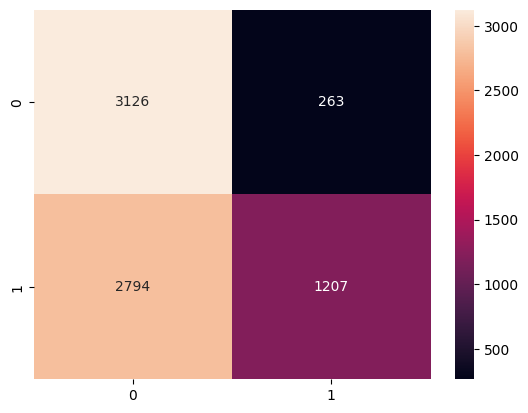

In [94]:
#feature selection
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=10)
rfe.fit(x_train_scaled,y_train)
x_train_rfe=rfe.transform(x_train_scaled)
x_test_rfe=rfe.transform(x_test_scaled)
lr.fit(x_train_rfe, y_train)
y_pred=lr.predict(x_test_rfe)
lr_fs_report=classification_report(y_test,y_pred)
print(lr_fs_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')
y_prob_fs= lr.predict_proba(x_test_rfe)[:, 1]

Text(0.5, 1.0, 'Feature Rankings from RFE')

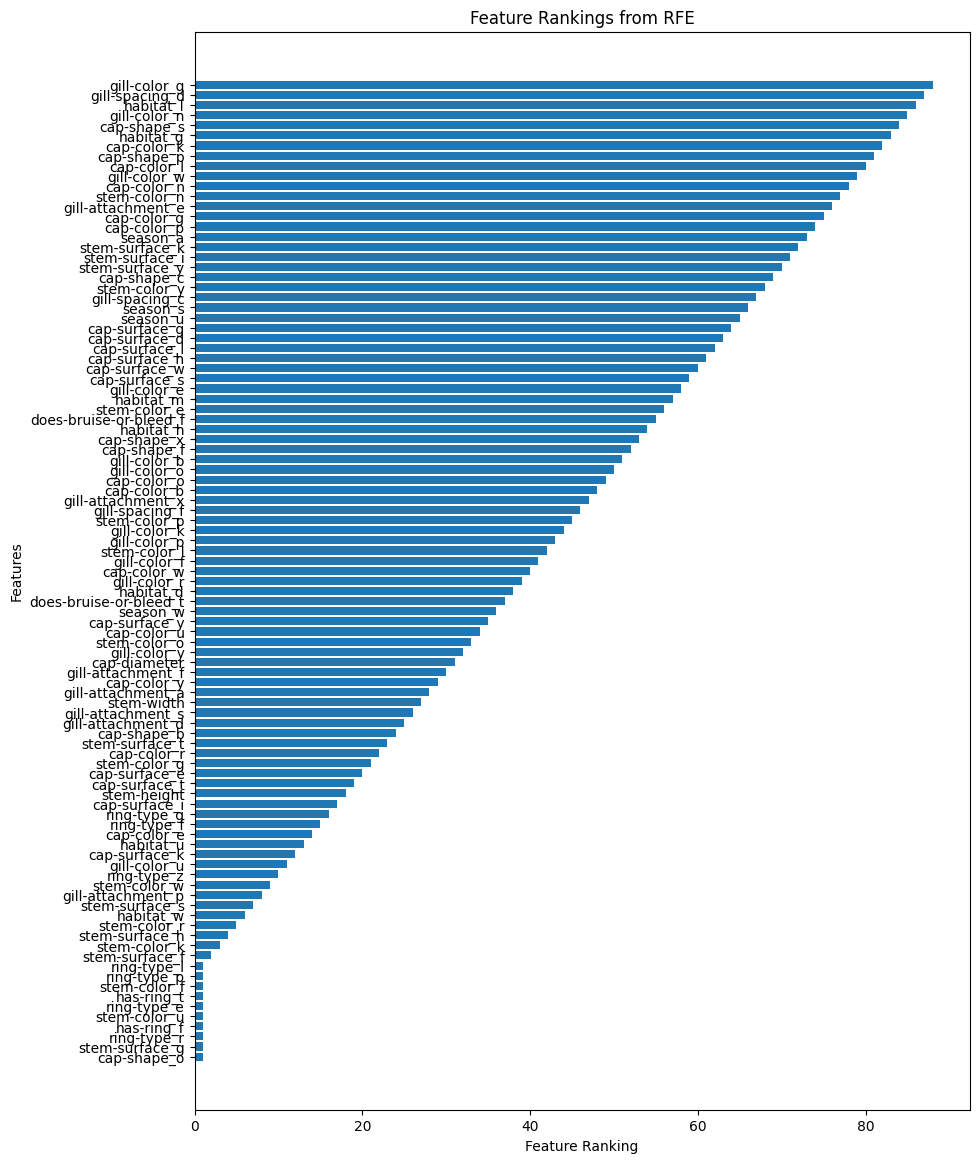

In [97]:
import numpy as np
all_features = x_train.columns
all_rankings = rfe.ranking_

# Sort by ranking (ascending)
sorted_idx = np.argsort(all_rankings)
sorted_features = all_features[sorted_idx]
sorted_rankings = all_rankings[sorted_idx]

plt.figure(figsize=(10, 14))
plt.barh(sorted_features, sorted_rankings)
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Rankings from RFE')

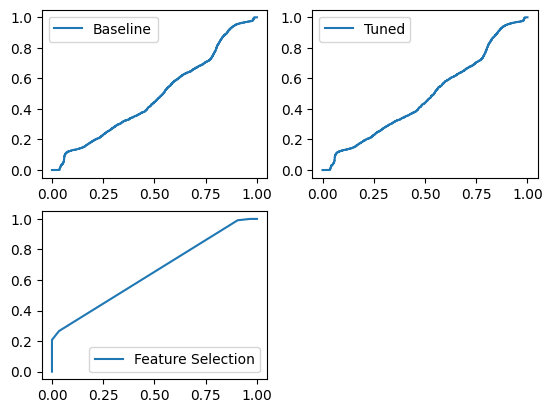

In [95]:
plt.subplot(2,2,1)
FPR,TPR,thresholds=roc_curve(y_test,y_prob_base)
plt.plot(FPR,TPR,label='Baseline')
plt.legend()
plt.subplot(2,2,2)
FPR,TPR,thresholds=roc_curve(y_test,y_prob_tuned)
plt.plot(FPR,TPR,label='Tuned')
plt.legend()
plt.subplot(2,2,3)
FPR,TPR,thresholds=roc_curve(y_test,y_prob_fs)
plt.plot(FPR,TPR,label='Feature Selection')
plt.legend()

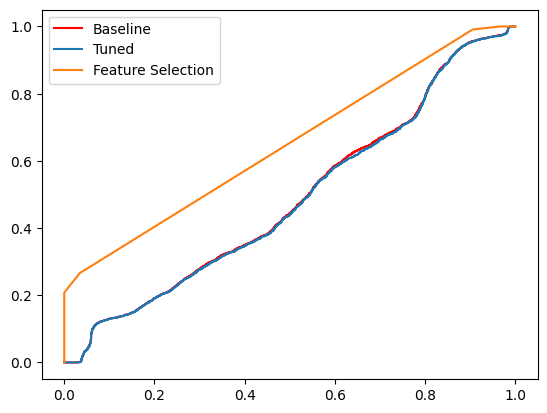

In [96]:
FPR,TPR,thresholds=roc_curve(y_test,y_prob_base)
plt.plot(FPR,TPR,label='Baseline',color='red')
plt.legend()

FPR,TPR,thresholds=roc_curve(y_test,y_prob_tuned)
plt.plot(FPR,TPR,label='Tuned')
plt.legend()

FPR,TPR,thresholds=roc_curve(y_test,y_prob_fs)
plt.plot(FPR,TPR,label='Feature Selection')
plt.legend()

Models with baseline and hyperparameter tuning show better performance than the one with feature selection. (Normal due to dimensionality performance trade off)

# DECISION TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3389
           1       1.00      1.00      1.00      4001

    accuracy                           1.00      7390
   macro avg       1.00      1.00      1.00      7390
weighted avg       1.00      1.00      1.00      7390

[[3388    1]
 [   5 3996]]


<Axes: >

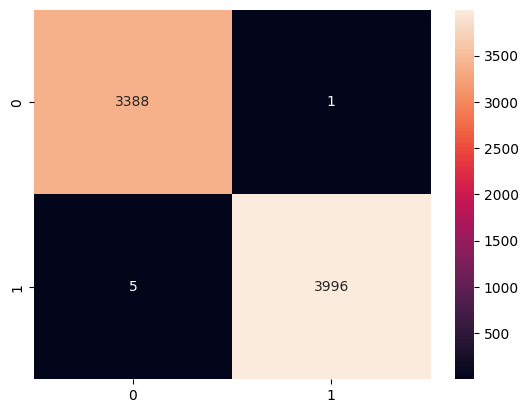

In [144]:
#Baseline
dt=DecisionTreeClassifier(random_state=44)
dt.fit(x_train_scaled,y_train)
y_pred=dt.predict(x_test_scaled)
dt_base_report=classification_report(y_test,y_pred)
print(dt_base_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [101]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,dt.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 44}
{'0': {'precision': 0.9997048406139315, 'recall': 0.9994098554145766, 'f1-score': 0.9995573262505534, 'support': 3389.0}, '1': {'precision': 0.9995002498750625, 'recall': 0.9997500624843789, 'f1-score': 0.9996251405722854, 'support': 4001.0}, 'accuracy': 0.9995940460081191, 'macro avg': {'precision': 0.999602545244497, 'recall': 0.9995799589494778, 'f1-score': 0.9995912334114194, 'support': 7390.0}, 'weighted avg': {'precision': 0.9995940736929281, 'recall': 0.9995940460081191, 'f1-score': 0.99959404141987, 'support': 7390.0}}
[[3387    2]
 [   1 4000]]


<Axes: >

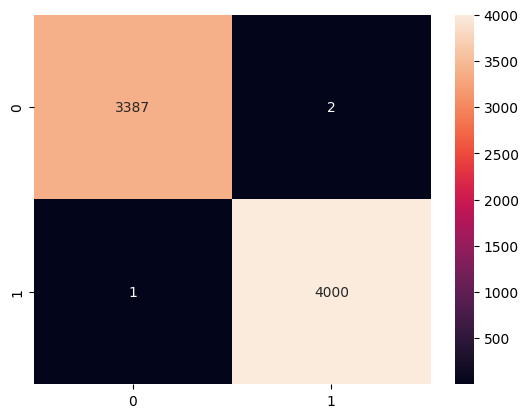

In [146]:
#cross validation (Tuned)
grid= {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state':[44]
}
cross_valid=GridSearchCV(dt,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
dt=DecisionTreeClassifier(**best_param)
dt.fit(x_train_scaled,y_train)
y_pred=dt.predict(x_test_scaled)
dt_tuned_report=classification_report(y_test,y_pred,output_dict=True)
print(dt_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [104]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,dt.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



[Text(0.6889634986225895, 0.96875, 'stem-width <= -0.1\nentropy = 0.995\nsamples = 29558\nvalue = [13555, 16003]\nclass = poisonous'),
 Text(0.4970730027548209, 0.90625, 'gill-spacing_d <= 0.879\nentropy = 0.899\nsamples = 13198\nvalue = [4164, 9034]\nclass = poisonous'),
 Text(0.5930182506887052, 0.9375, 'True  '),
 Text(0.41012396694214875, 0.84375, 'cap-shape_c <= 2.895\nentropy = 0.791\nsamples = 10385\nvalue = [2468.0, 7917.0]\nclass = poisonous'),
 Text(0.3991046831955923, 0.78125, 'gill-color_o <= 2.048\nentropy = 0.739\nsamples = 10003\nvalue = [2086, 7917]\nclass = poisonous'),
 Text(0.3298898071625344, 0.71875, 'gill-color_e <= 3.499\nentropy = 0.677\nsamples = 9311\nvalue = [1664, 7647]\nclass = poisonous'),
 Text(0.31887052341597794, 0.65625, 'does-bruise-or-bleed_t <= 0.715\nentropy = 0.649\nsamples = 9172\nvalue = [1525, 7647]\nclass = poisonous'),
 Text(0.2465564738292011, 0.59375, 'gill-color_w <= 0.467\nentropy = 0.56\nsamples = 8163\nvalue = [1068, 7095]\nclass = pois

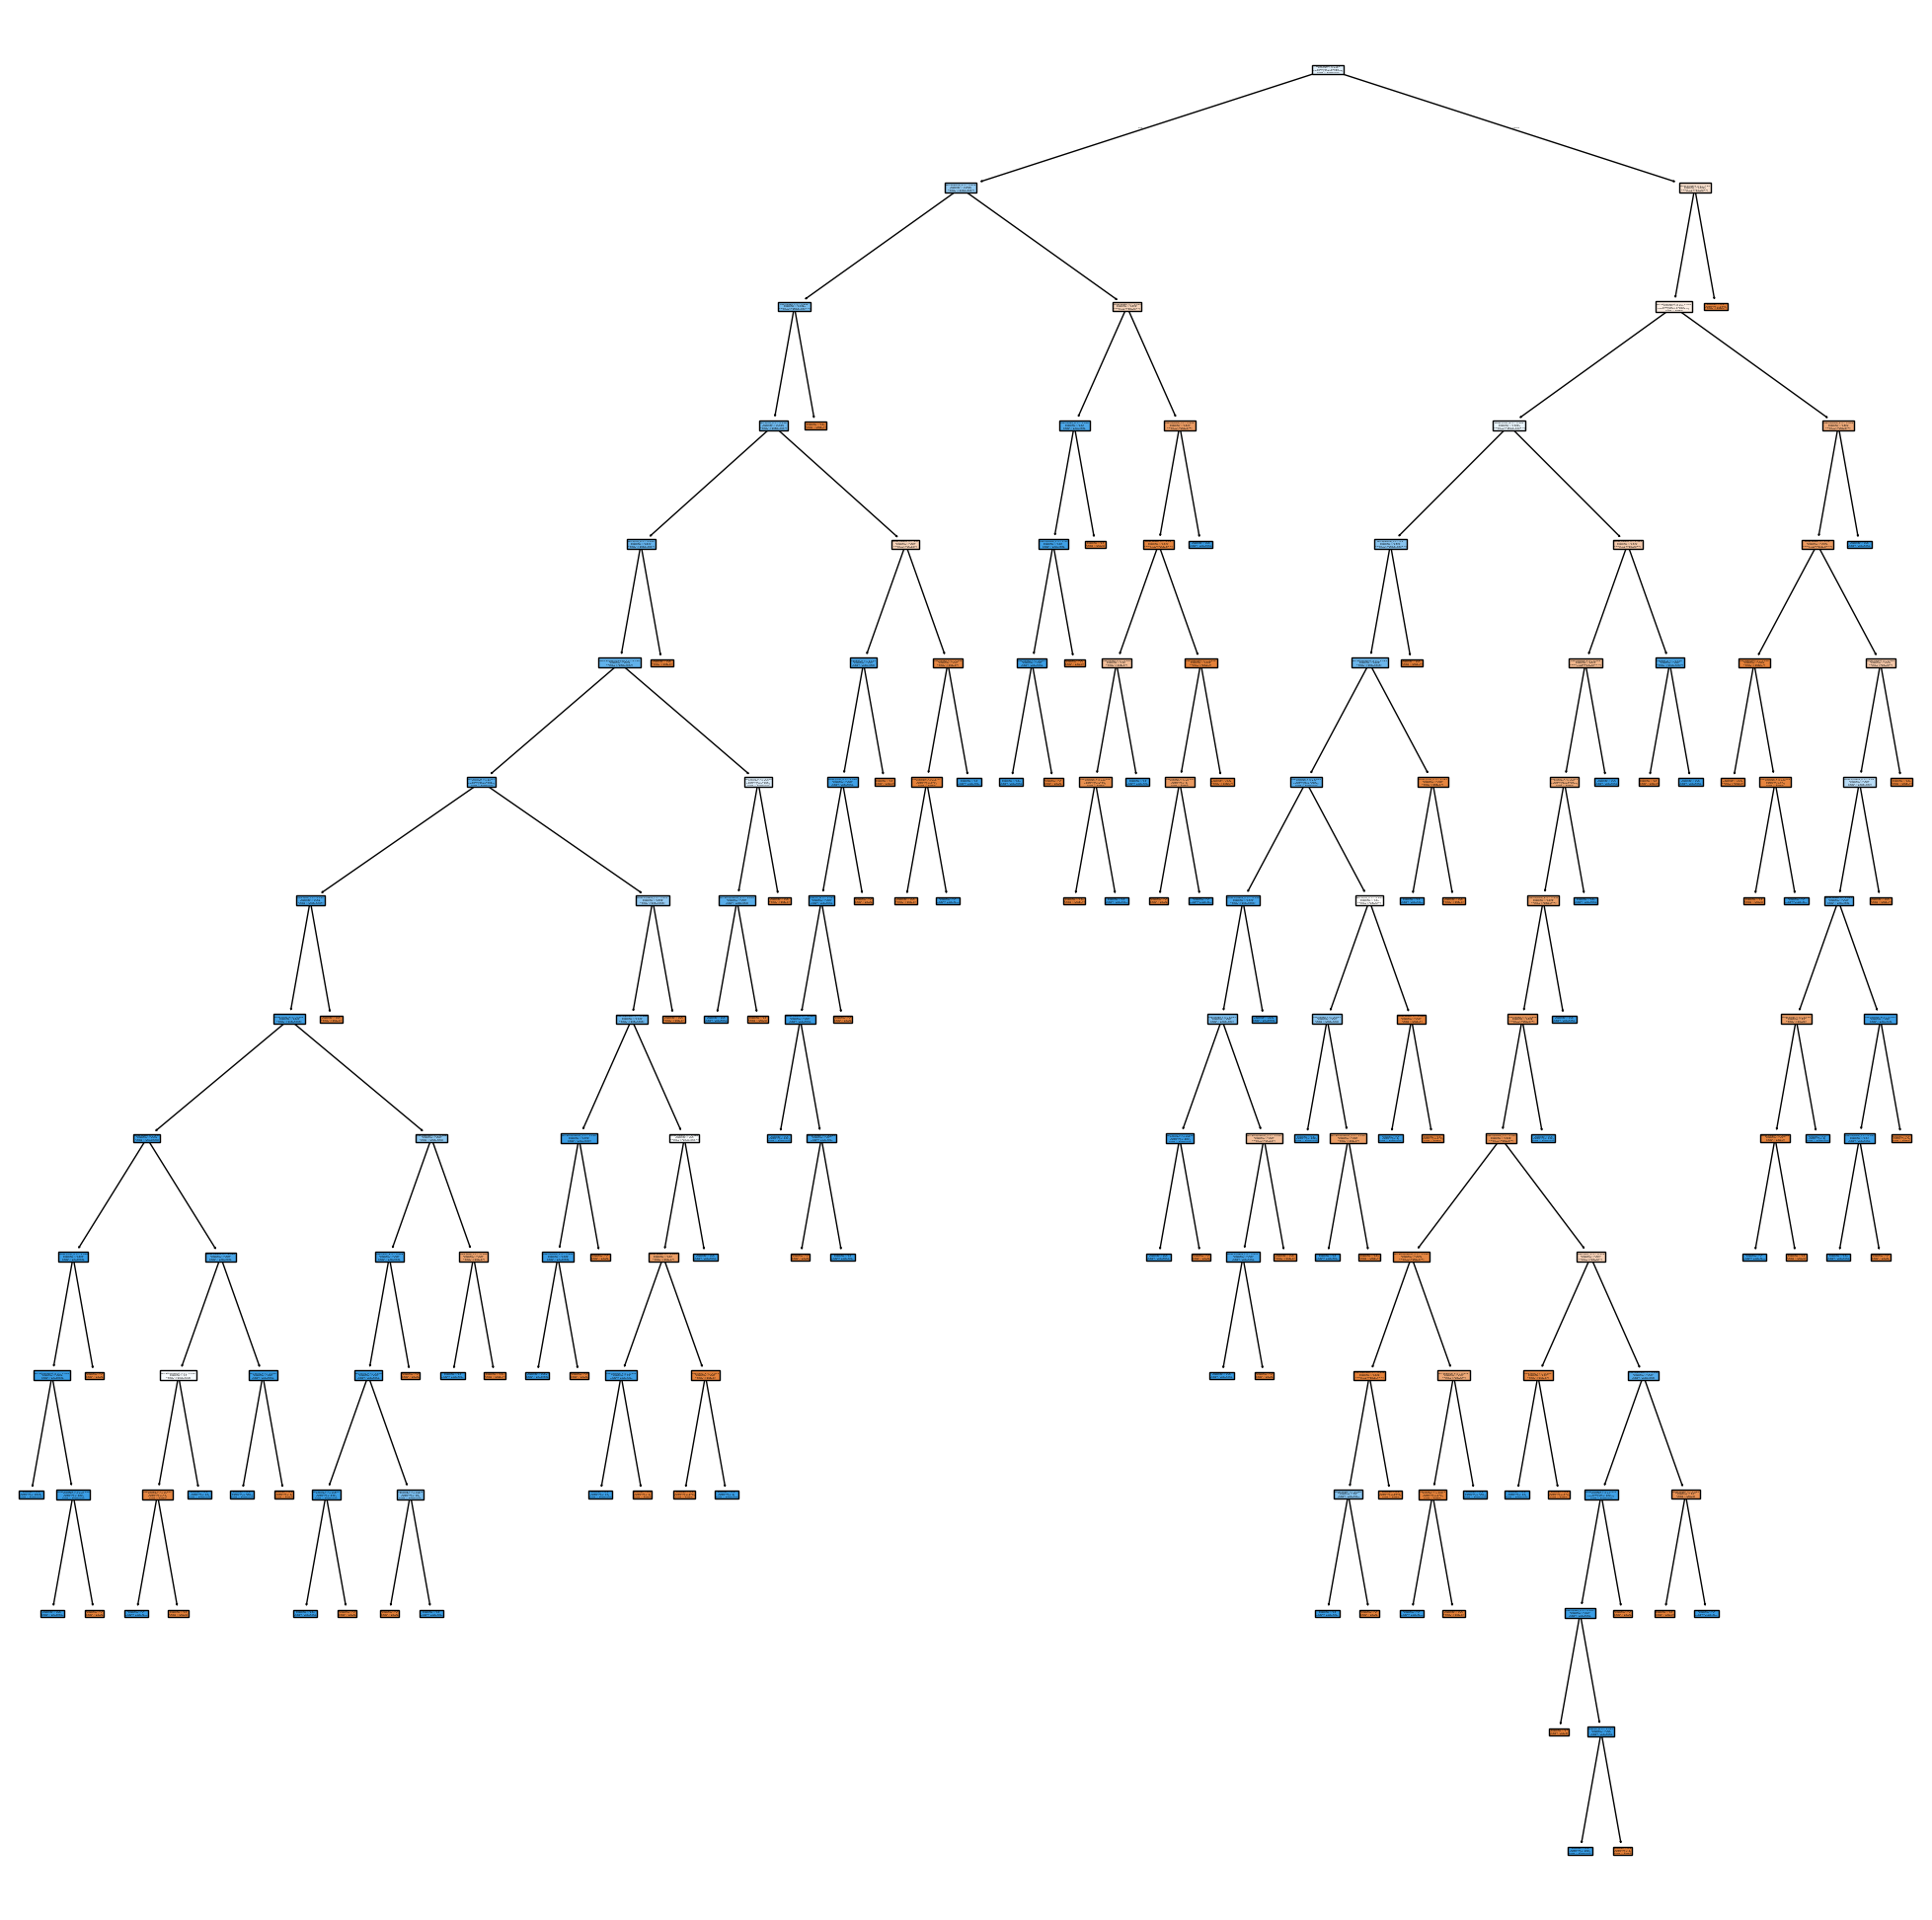

In [105]:
#plotting the best decision tree out of the 3
plt.figure(figsize=(25,25))
plot_tree(dt,filled=True,feature_names=x_train.columns,class_names=['edible','poisonous'])

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3389
           1       0.95      0.95      0.95      4001

    accuracy                           0.95      7390
   macro avg       0.95      0.95      0.95      7390
weighted avg       0.95      0.95      0.95      7390

[[3193  196]
 [ 181 3820]]


<Axes: >

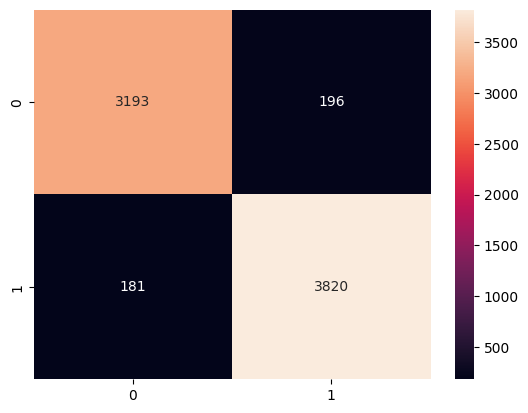

In [106]:
#feature selection
rfe=RFE(dt,n_features_to_select=10)
rfe.fit(x_train_scaled,y_train)
x_train_rfe=rfe.transform(x_train_scaled)
x_test_rfe=rfe.transform(x_test_scaled)
dt.fit(x_train_rfe, y_train)
y_pred=dt.predict(x_test_rfe)
dt_fs_report=classification_report(y_test,y_pred)
print(dt_fs_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

Models with baseline and hyperparameter tuning show better performance than the one with feature selection (with tuned being better), but only with a really small  difference. (Dimensionality reduction and performance trade off)

# RANDOM FOREST

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3389.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4001.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}}
[[3389    0]
 [   0 4001]]


<Axes: >

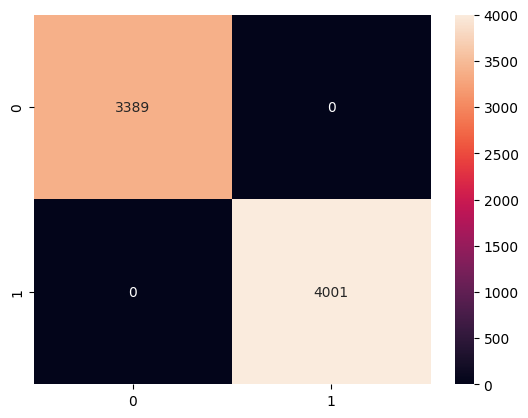

In [147]:
#Baseline
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=44)
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)
rf_base_report=classification_report(y_test,y_pred,output_dict=True)
print(rf_base_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [108]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,rf.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 44}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3389
           1       1.00      1.00      1.00      4001

    accuracy                           1.00      7390
   macro avg       1.00      1.00      1.00      7390
weighted avg       1.00      1.00      1.00      7390

[[3389    0]
 [   0 4001]]


<Axes: >

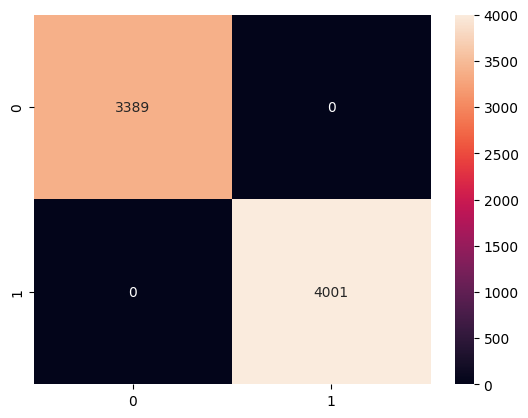

In [109]:
#cross validation (Tuned)
grid= {
    'n_estimators': [5, 10],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state':[44]
}
cross_valid=GridSearchCV(rf,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
rf=RandomForestClassifier(**best_param)
rf.fit(x_train_scaled,y_train)
y_pred=rf.predict(x_test_scaled)
rf_tuned_report=classification_report(y_test,y_pred)
print(rf_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [110]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,rf.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



Identical which means default parameters are the most suitable.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3389
           1       0.98      0.99      0.98      4001

    accuracy                           0.98      7390
   macro avg       0.98      0.98      0.98      7390
weighted avg       0.98      0.98      0.98      7390

[[3317   72]
 [  55 3946]]


<Axes: >

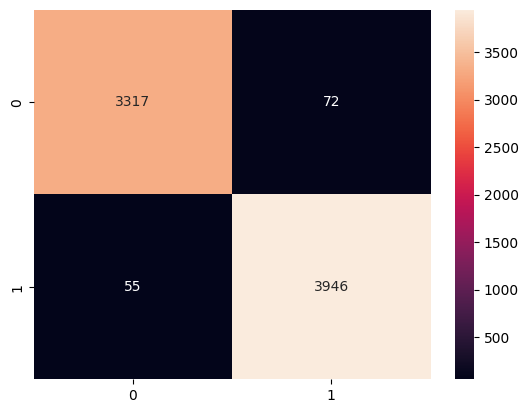

In [111]:
#feature selection
rfe=RFE(rf,n_features_to_select=10)
rfe.fit(x_train_scaled,y_train)
x_train_rfe=rfe.transform(x_train_scaled)
x_test_rfe=rfe.transform(x_test_scaled)
rf.fit(x_train_rfe, y_train)
y_pred=rf.predict(x_test_rfe)
rf_fs_report=classification_report(y_test,y_pred)
print(rf_fs_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

Models with baseline and hyperparameter tuning show better performance than the one with feature selection, but only with a really small  difference. (Normal due to dimensionality performance trade off)

# NAIVE BAYES'

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3389
           1       0.77      0.77      0.77      4001

    accuracy                           0.75      7390
   macro avg       0.75      0.75      0.75      7390
weighted avg       0.75      0.75      0.75      7390

[[2454  935]
 [ 933 3068]]


<Axes: >

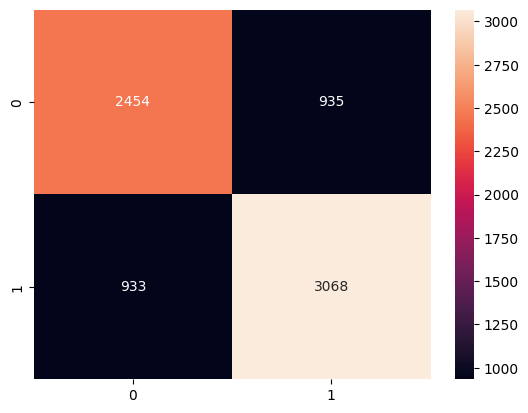

In [112]:
#Baseline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
nb_base_report=classification_report(y_test,y_pred)
print(nb_base_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

#Used features were not scaled as NB assumes that features represent counts

In [121]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,nb.predict(x_train)))
#performs better in testing than training >> slight underfitting

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     13555
           1       0.78      0.74      0.76     16003

    accuracy                           0.74     29558
   macro avg       0.74      0.74      0.74     29558
weighted avg       0.75      0.74      0.74     29558



{'alpha': 0.01, 'fit_prior': False}
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      3389
           1       0.78      0.75      0.76      4001

    accuracy                           0.75      7390
   macro avg       0.75      0.75      0.75      7390
weighted avg       0.75      0.75      0.75      7390

[[2533  856]
 [1012 2989]]


<Axes: >

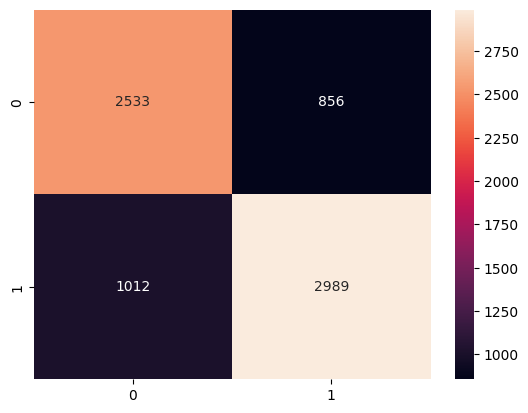

In [114]:
#cross validation (Tuned)
grid= {
    'alpha': [0.01, 0.1, 1.0],
    'fit_prior': [True, False]
}
#The key hyperparameters for Multinomial NB include alpha, which is the Laplace smoothing parameter that helps
#handle zero probabilities in the data, and fit_prior, which determines whether the model should learn class prior probabilities.
cross_valid=GridSearchCV(nb,param_grid=grid,cv=5)
cross_valid.fit(x_train,y_train)
best_param=cross_valid.best_params_
print(best_param)
nb=MultinomialNB(**best_param)
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
nb_tuned_report=classification_report(y_test,y_pred)
print(nb_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [122]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,nb.predict(x_train)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     13555
           1       0.78      0.74      0.76     16003

    accuracy                           0.74     29558
   macro avg       0.74      0.74      0.74     29558
weighted avg       0.75      0.74      0.74     29558



Base and tuned models are very close in performance but both are bad and suffer from underfitting.
Naive Bayes' assume features are independant and features here are correlated, that's why it doesn't work well.

# KNN

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3389.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4001.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}}
[[3389    0]
 [   0 4001]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


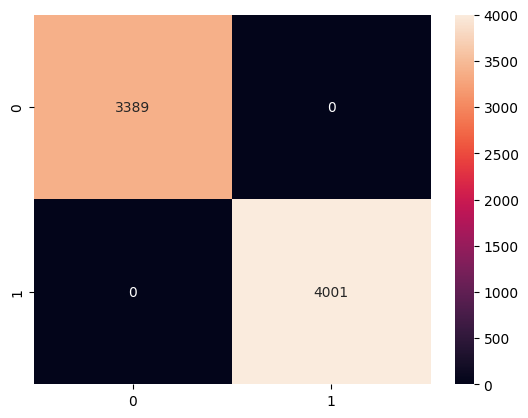

In [148]:
#Baseline
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
knn_base_report=classification_report(y_test,y_pred,output_dict=True)
print(knn_base_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')
y_prob_base = knn.predict_proba(x_test)[:, 1]

In [118]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,knn.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



{'metric': 'manhattan', 'n_neighbors': np.int64(3), 'p': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3389
           1       1.00      1.00      1.00      4001

    accuracy                           1.00      7390
   macro avg       1.00      1.00      1.00      7390
weighted avg       1.00      1.00      1.00      7390

[[3389    0]
 [   0 4001]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


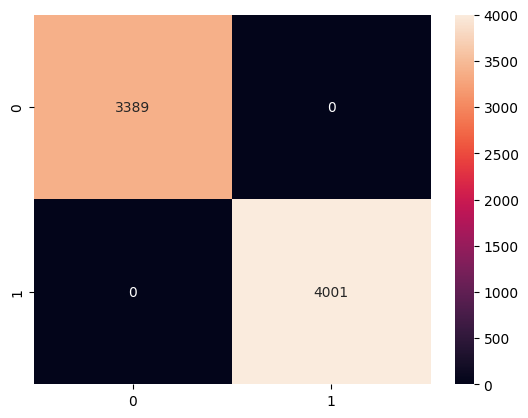

In [119]:
#cross validation (Tuned)
grid={
    'n_neighbors': np.arange(2,6),
    'metric':['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] #for minkowski
}
cross_valid=GridSearchCV(knn,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
knn=KNeighborsClassifier(**best_param)
knn.fit(x_train_scaled,y_train)
y_pred=knn.predict(x_test_scaled)
knn_tuned_report=classification_report(y_test,y_pred)
print(knn_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')
y_prob_tuned = knn.predict_proba(x_test)[:, 1]

In [120]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,knn.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



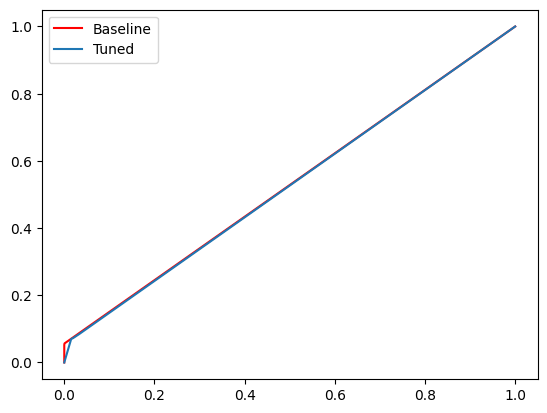

In [123]:
FPR,TPR,thresholds=roc_curve(y_test,y_prob_base)
plt.plot(FPR,TPR,label='Baseline',color='red')
plt.legend()

FPR,TPR,thresholds=roc_curve(y_test,y_prob_tuned)
plt.plot(FPR,TPR,label='Tuned')
plt.legend()

identical performance, although cross validation cost alot of computation time

## Boosting + KNN

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3389
           1       0.90      0.97      0.93      4001

    accuracy                           0.93      7390
   macro avg       0.93      0.92      0.92      7390
weighted avg       0.93      0.93      0.93      7390

[[2978  411]
 [ 136 3865]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:24:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Axes: >

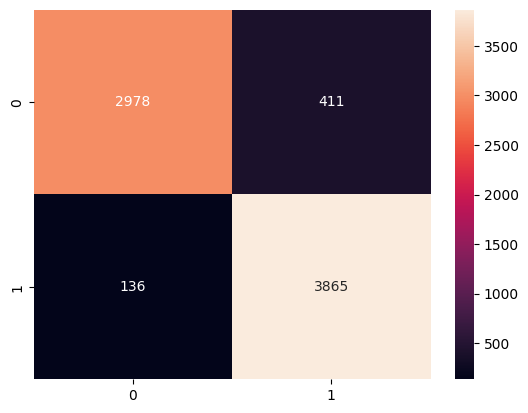

In [124]:
from xgboost import XGBClassifier
gb=XGBClassifier(estimator=knn,n_estimators=5,random_state=44)
gb.fit(x_train_scaled,y_train)
y_pred=gb.predict(x_test_scaled)
gb_report=classification_report(y_test,y_pred)
print(gb_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

needs hyperparameter tuning

In [125]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,gb.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     13555
           1       0.91      0.96      0.94     16003

    accuracy                           0.93     29558
   macro avg       0.93      0.92      0.93     29558
weighted avg       0.93      0.93      0.93     29558



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:26:02] WARNING: /workspace/src/learner.cc:738: 
Pa

{'estimator': 'knn', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10, 'subsample': 0.7}
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3389
           1       0.94      0.97      0.96      4001

    accuracy                           0.95      7390
   macro avg       0.95      0.95      0.95      7390
weighted avg       0.95      0.95      0.95      7390

[[3154  235]
 [ 119 3882]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:27:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Axes: >

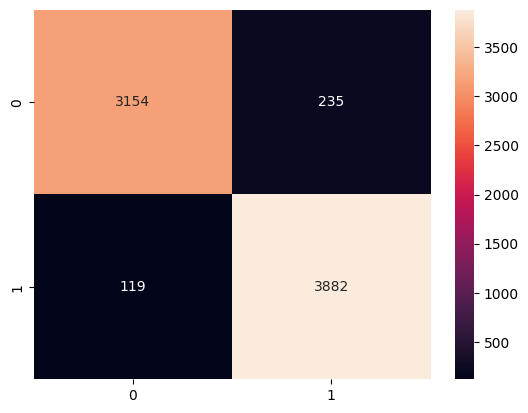

In [126]:
#cross validation (Tuned)
grid={
      'n_estimators': [5, 10],
      'estimator': ['knn'],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.1, 0.01, 0.001],
      'subsample': [0.5, 0.7, 1]
}
cross_valid=GridSearchCV(gb,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
gb=XGBClassifier(**best_param)
gb.fit(x_train_scaled,y_train)
y_pred=gb.predict(x_test_scaled)
gb_tuned_report=classification_report(y_test,y_pred)
print(gb_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [127]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,gb.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     13555
           1       0.94      0.97      0.96     16003

    accuracy                           0.95     29558
   macro avg       0.96      0.95      0.95     29558
weighted avg       0.95      0.95      0.95     29558



Better performance than the baeseline model,
but both boosting models show worse performance than normal KNN.

# SVM

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3389.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4001.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7390.0}}
[[3389    0]
 [   0 4001]]


<Axes: >

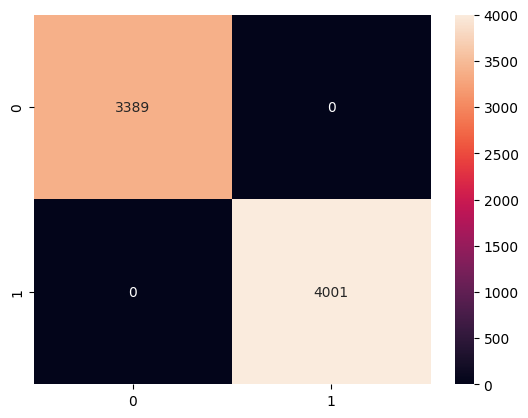

In [152]:
#Baseline
from sklearn.svm import SVC
svm=SVC(random_state=44)
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
svm_base_report=classification_report(y_test,y_pred,output_dict=True)
print(svc_base_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [133]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,knn.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



{'C': 1, 'degree': 2, 'kernel': 'rbf', 'random_state': 44}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3389
           1       1.00      1.00      1.00      4001

    accuracy                           1.00      7390
   macro avg       1.00      1.00      1.00      7390
weighted avg       1.00      1.00      1.00      7390

[[3389    0]
 [   0 4001]]


<Axes: >

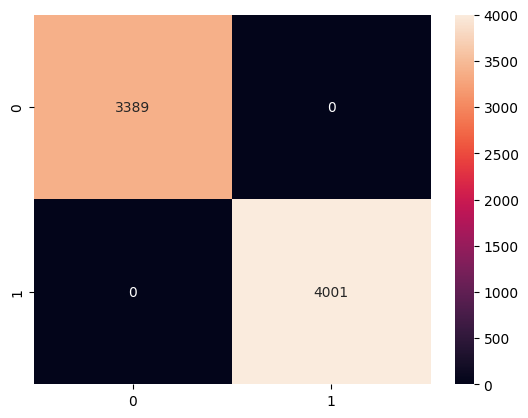

In [134]:
#cross validation (Tuned)
grid= {
       'C': [0.1, 1, 10],
       'kernel': ['rbf', 'poly'],
       'degree':[2,3,4],
       'random_state':[44]
}
cross_valid=GridSearchCV(svm,param_grid=grid,cv=5)
cross_valid.fit(x_train_scaled,y_train)
best_param=cross_valid.best_params_
print(best_param)
svm=SVC(**best_param)
svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)
svm_tuned_report=classification_report(y_test,y_pred)
print(svm_tuned_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [135]:
print('Evaluate Training to test for underfitting or overfitting')
print(classification_report(y_train,svm.predict(x_train_scaled)))

Evaluate Training to test for underfitting or overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13555
           1       1.00      1.00      1.00     16003

    accuracy                           1.00     29558
   macro avg       1.00      1.00      1.00     29558
weighted avg       1.00      1.00      1.00     29558



In [137]:
#feature selection
rfe=RFE(svm,n_features_to_select=10)
rfe.fit(x_train_scaled,y_train)
x_train_rfe=rfe.transform(x_train_scaled)
x_test_rfe=rfe.transform(x_test_scaled)
svm.fit(x_train_rfe, y_train)
y_pred=svm.predict(x_test_rfe)
svm_fs_report=classification_report(y_test,y_pred)
print(svm_fs_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

RFE requires the estimator (SVC) to expose either a .coef_ or .feature_importances_ attribute

SVC with non-linear kernels (rbf, poly) does not expose .coef_ and that's what causes this error.

using SelectKBest with ANOVA F-test:

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3389
           1       0.82      0.94      0.88      4001

    accuracy                           0.86      7390
   macro avg       0.87      0.85      0.85      7390
weighted avg       0.86      0.86      0.85      7390

[[2585  804]
 [ 257 3744]]


<Axes: >

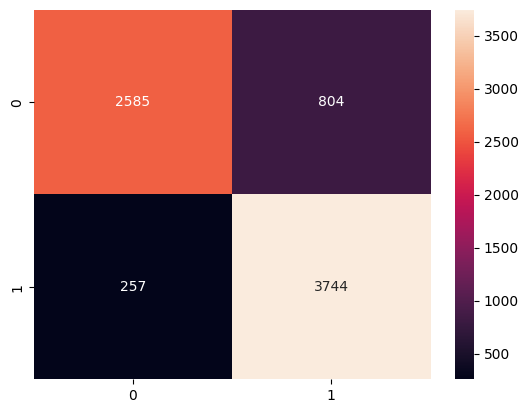

In [139]:
#Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x_train_scaled,y_train)
x_train_kbest = selector.transform(x_train_scaled)
x_test_kbest = selector.transform(x_test_scaled)
svm.fit(x_train_kbest, y_train)
y_pred = svm.predict(x_test_kbest)
svm_fs_report=classification_report(y_test,y_pred)
print(svm_fs_report)
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt='d')

Models with baseline and hyperparameter tuning show better performance than the one with feature selection (with tuned being better), but only with a really small  difference. (Dimensionality reduction and performance trade off)

# CONCLUSION

The best versions of each model are:

-LR : baseline ver, although it showed overall bad

-DT : tuned ver

-RF : baseline and tuned vers are identical, but baseline>tuned due to computations

-NB: Both versions show close performance which is bad

-KNN: baseline, tuned ver requires ALOT of compuations

-Boosting + KNN : the tuned ver, but both are worse than normal KNN

-SVM: tuned ver took TOO long so base

we will compare between the best of : LR, DT, RF, KNN, SVM
their classification report is edited output_dict=True

In [162]:
comparison_df = pd.DataFrame({
    'Logistic Regression': lr_base_report['weighted avg'],
    'Decision Tree': dt_tuned_report['weighted avg'],
    'Random Forest': rf_base_report['weighted avg'],
    'KNN': knn_base_report['weighted avg'],
    'SVM': svm_base_report['weighted avg']
})

#Display
comparison_df.T.style.background_gradient(cmap='Blues')


,precision,recall,f1-score,support
Logistic Regression,0.831568,0.830988,0.831141,7390.000000
Decision Tree,0.999594,0.999594,0.999594,7390.000000
Random Forest,1.000000,1.000000,1.000000,7390.000000
KNN,1.000000,1.000000,1.000000,7390.000000
SVM,1.000000,1.000000,1.000000,7390.000000


In [153]:
# Create DataFrame with selected model versions from the weighted avg
metrics_df = pd.DataFrame ({

    'Logistic Regression': {
        'Precision': lr_base_report ['weighted avg']['precision'],
        'Recall': lr_base_report ['weighted avg']['recall'],
        'F1-Score': lr_base_report ['weighted avg']['f1-score']
    },

    'Decision Tree': {
        'Precision': dt_tuned_report['weighted avg']['precision'],
        'Recall': dt_tuned_report['weighted avg']['recall'],
        'F1-Score': dt_tuned_report['weighted avg']['f1-score']
    },

    'Random Forest': {
        'Precision': rf_base_report['weighted avg']['precision'],
        'Recall': rf_base_report['weighted avg']['recall'],
        'F1-Score': rf_base_report['weighted avg']['f1-score']
    },

    'KNN':{
        'Precision': knn_base_report['weighted avg']['precision'],
        'Recall': knn_base_report['weighted avg']['recall'],
        'F1-Score': knn_base_report['weighted avg']['f1-score']
    },

    'SVM': {
        'Precision': svm_base_report['weighted avg']['precision'],
        'Recall': svm_base_report['weighted avg']['recall'],
        'F1-Score': svm_base_report['weighted avg']['f1-score']
    }
})


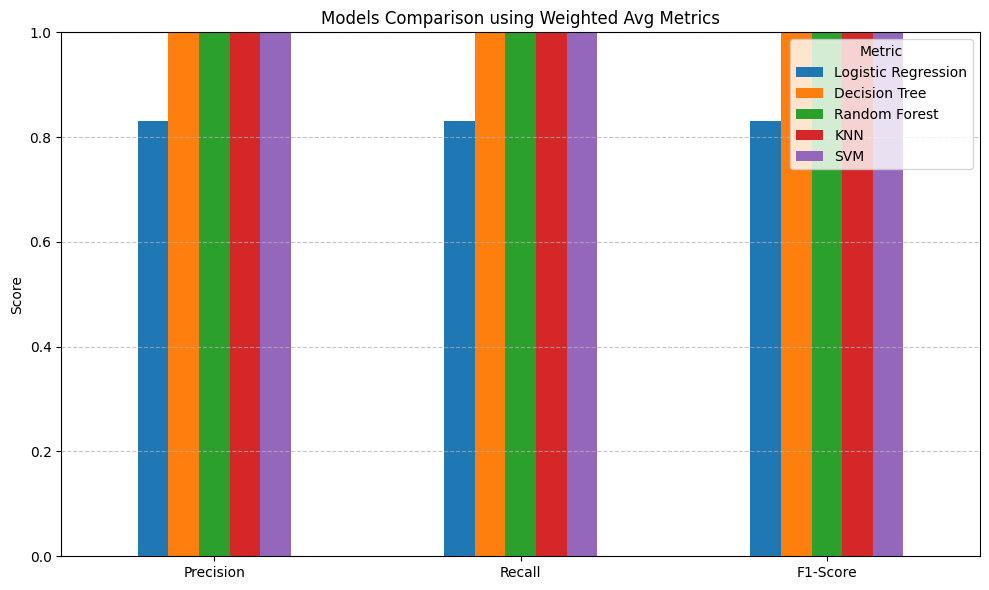

In [159]:
# Transpose
metrics_df = metrics_df.T
# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Models Comparison using Weighted Avg Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

As expected LR is the weakest model in all metrics, while the other 5 models have the best identical performance.

<Figure size 800x600 with 0 Axes>

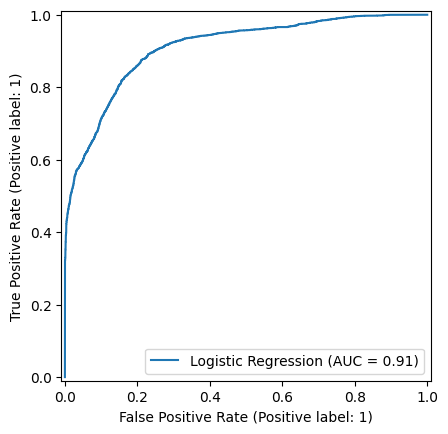

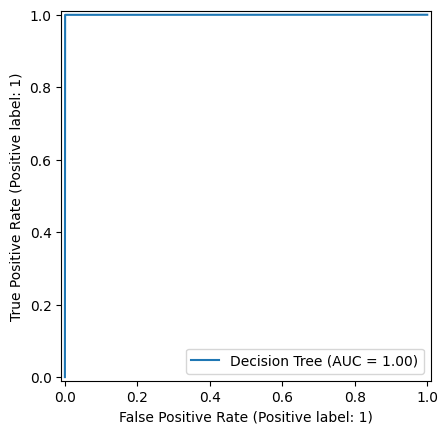

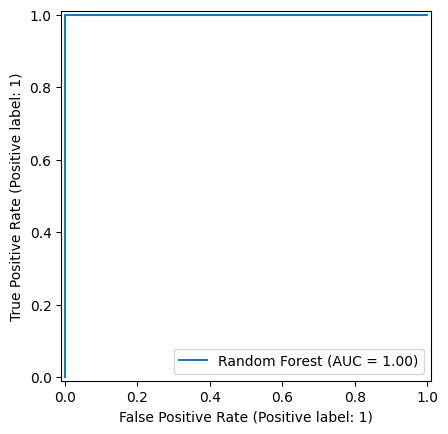

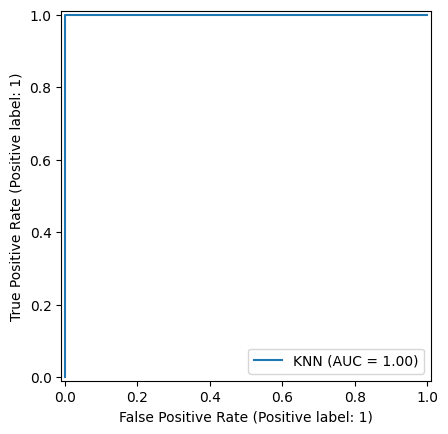

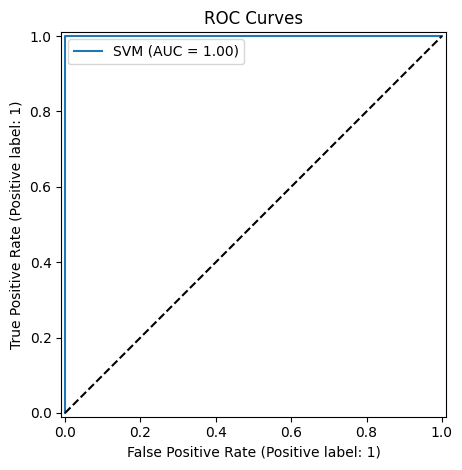

In [160]:
from sklearn.metrics import RocCurveDisplay
#After running the best version of each model
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn,
    'SVM': svm
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, x_test_scaled, y_test, name=name)

plt.title('ROC Curves')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()

# Pickle

The best files : SVM, KNN, DT, RF will be saved

In [163]:
import pickle

In [165]:
with open ('classification_models.pkl', 'wb') as f:
    pickle.dump(models, f)

print("Models saved to 'classification_models.pkl'")

Models saved to 'classification_models.pkl'


- Opens a file named 'classification_models.pkl' in write-binary mode ('wb').

'wb' is required because pickle writes data in binary format.

The with statement ensures that the file is automatically closed after writing, even if errors occur.

- pickle.dump(models, f)
Serializes (saves) the entire models dictionary to the file f.

This writes all 4 models into the .pkl file as one object.

pickle.dump(object, file) is the syntax for saving data.

## Mushroom Classification Project

### Problem Description
The goal of this project is to classify mushrooms as **edible (e)** or **poisonous (p)** based on 20 descriptive features such as cap shape, cap color, stem characteristics, habitat, and season.  
This is a **binary classification problem** where the target variable is the mushroom class (`edible` or `poisonous`).  

---

### Project Workflow

#### 1. Exploratory Data Analysis (EDA)
- Inspect the dataset structure (rows, columns, data types).  
- Check for missing values and duplicates.  
- Visualize distributions of categorical features (bar plots) and numeric features (histograms, boxplots).  
- Explore correlations between features and the target class.  
- Look for class imbalance in the target variable (edible vs poisonous).  

#### 2. Data Cleaning & Preprocessing
- Handle missing values or unknown entries if present.  
- Encode categorical features (e.g., **One-Hot Encoding** or **Label Encoding**).  
- Scale numerical features (e.g., **StandardScaler** or **MinMaxScaler**).  
- Stratify the dataset when splitting into **training and test sets** to maintain class balance.  
- If class imbalance is significant, apply oversampling techniques (e.g., **SMOTE**).  

#### 3. Feature Selection
To reduce dimensionality and improve generalization, apply feature selection techniques such as:  
- **Filter Methods:** Use statistical tests (e.g., Chi-square, ANOVA F-test, mutual information) to rank features.  
- **Wrapper Methods:** Apply Recursive Feature Elimination (**RFE**) with models like Logistic Regression or Decision Trees.  
- **Embedded Methods:** Leverage feature importance from models (e.g., Decision Tree, Random Forest, Lasso Regression).  
- Compare model performance before and after feature selection to evaluate impact.  

#### 4. Model Training & Evaluation
Train and evaluate the following classification models:  
- **Logistic Regression**  
- **Decision Tree**  
- **Random Forest**  
- **Support Vector Machine (SVM)**  
- **K-Nearest Neighbors (KNN)**  
- **Naive Bayes**  

For each model:  
- Train on the **training set**.  
- Evaluate on the **test set** using:  
  - **Classification Report** (Precision, Recall, F1-score, Accuracy)  
  - **Confusion Matrix**  
  - **Cross-validation (optional)** for stability check  

#### 5. Hyperparameter Tuning
To improve model performance, apply hyperparameter optimization techniques:  
- **Grid Search:** Exhaustively search all combinations of parameters (good for small parameter spaces).  
- **Random Search:** Randomly sample parameter combinations (more efficient for large parameter spaces).  
- **Bayesian Optimization:** Iteratively choose hyperparameters based on past performance (efficient for complex models like Random Forest, SVM, or KNN).  

Compare tuned models with baseline models to measure improvement.  

#### 6. Feature Importance
- Extract **feature importance** from Decision Tree and Random Forest models.  
- Rank features to identify the most influential ones for classification.  
- Use feature importance as a basis for feature selection and model simplification.  

#### 7. Model Comparison
- Compare performance across all models (baseline, tuned, and with feature selection).  
- Use metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to decide the best-performing model.
- Create plot of ROC-AUC curve of each model with different color for comparison  
- Summarize results in a **comparison table** or **bar plot**.  

---

#### 8. Save best models as pickle files

---

### Final Deliverables
- Preprocessed dataset ready for classification.  
- Performance evaluation of six classification models.  
- Insights on class imbalance and handling techniques.  
- Feature selection results (filter, wrapper, and embedded methods).  
- Hyperparameter tuning results from Grid Search, Random Search, and Bayesian Optimization.  
- Feature importance ranking for better model interpretability.  
- Final comparison and recommendation of the best-performing model for mushroom classification.  
- pickle files of the saved models
